In [1]:
# Libs para modelagem e matrizes

import numpy as np
import pandas as pd

# Libs para analise grafica

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Lib para ignorar avisos
import warnings

# desabilitar avisos
warnings.filterwarnings('ignore')


In [2]:
base_dados = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')

In [3]:
# verificando os dados
base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [4]:
# verificando dimensões -- quantidade de linhas
base_dados.shape

(1034, 9)

In [5]:
# verificando os campos nulos qtde total
base_dados.isnull().sum()


Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

In [6]:
#Exibir as linhas que possuem valores nulos

base_dados[base_dados.isnull().any(axis=1)]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
447,Ultra Street Fighter IV,NaN,Fighting,NaN,0.0,0.08,0.00,0.01,0.10
466,Dragon's Dogma Online,NaN,Role-Playing,NaN,0.0,0.00,0.09,0.00,0.09
630,This War of Mine,NaN,Action,NaN,0.0,0.02,0.00,0.00,0.03
724,A Boy and His Blob,NaN,Platform,NaN,0.0,0.00,0.00,0.00,0.00
727,Another World,NaN,Adventure,NaN,0.0,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
1019,Sakuna: Of Rice and Ruin,NaN,Action,NaN,0.0,0.00,0.00,0.00,0.00
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,0.0,0.00,0.00,0.00,0.00
1031,The Mummy Demastered,NaN,Action,NaN,0.0,0.00,0.00,0.00,0.00
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,0.0,0.00,0.00,0.00,0.00


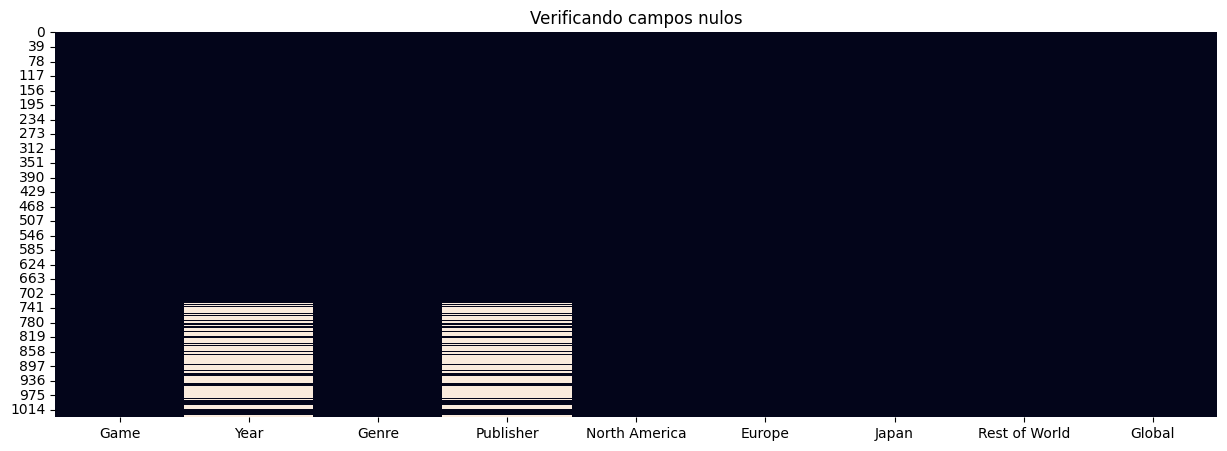

In [7]:
# nulos graficos
plt.figure(figsize=(15,5))
plt.title('Verificando campos nulos')
sns.heatmap(base_dados.isnull(), cbar=False);

In [8]:
# retirando os campos nulos
base_dados.dropna( inplace=True)

In [9]:
base_dados.shape

(825, 9)

In [10]:
# estatitica
base_dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


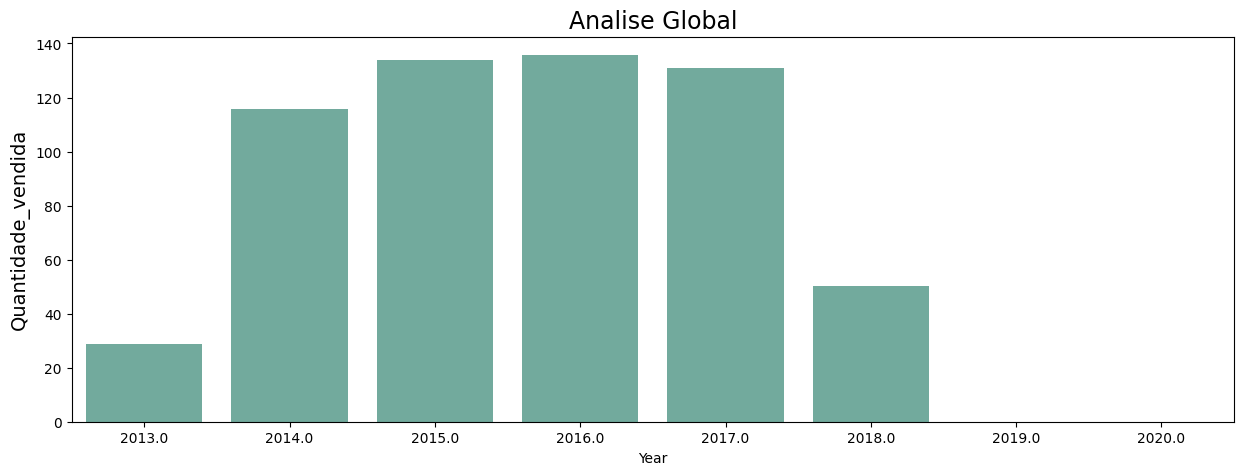

In [11]:
plt.figure(figsize= (15,5))
plt.title('Analise Global', fontsize=17)
sns.barplot( data=base_dados, x="Year", y="Global", ci=None, color='#69b3a2', estimator=sum)
plt.ylabel('Quantidade_vendida', fontsize=14);


In [12]:
# retirando os anos 
base_dados = base_dados.loc[( base_dados['Year'] !=2019) & ( base_dados['Year'] !=2020)]

In [13]:
# Verificando
base_dados["Year"].unique()

array([2014., 2015., 2018., 2017., 2016., 2013.])

In [14]:
base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


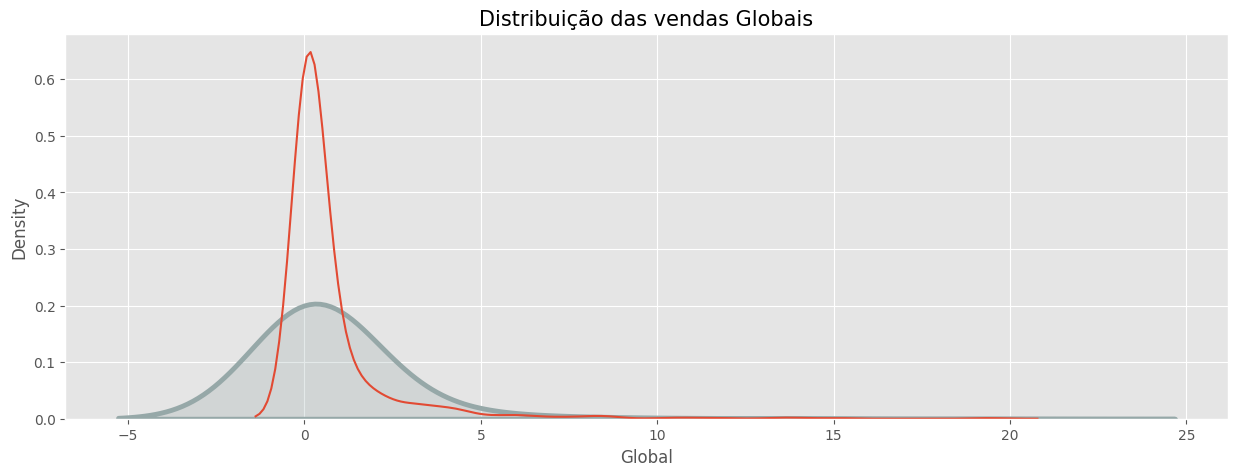

In [15]:
plt.figure(figsize=(15,5))

plt.style.use('ggplot')
sns.kdeplot(base_dados['Global'])
plt.title( 'Distribuição das vendas Globais', fontsize= 15)
sns.kdeplot(base_dados['Global'], shade=True, bw=1, color= '#96a8a8', linewidth=3.5);

In [16]:
base_dados.groupby(by=['Year']).sum()

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


<AxesSubplot:title={'left':'Analise_distribuição'}, xlabel='Year', ylabel='Global'>

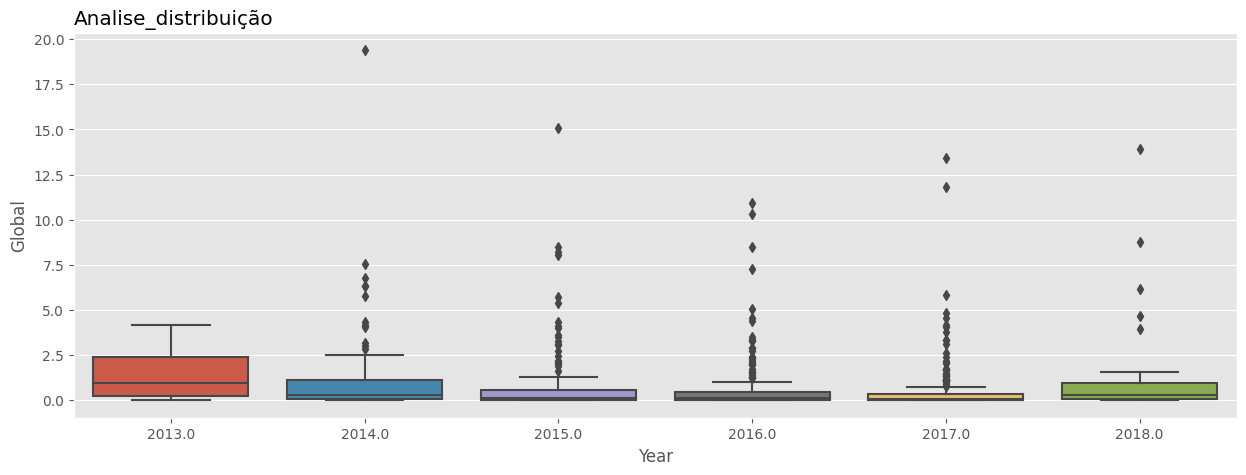

In [17]:
plt.figure(figsize= (15,5))
plt.title('Analise_distribuição', loc=('left'))
sns.boxplot(data=base_dados, x='Year', y='Global')

In [18]:
base_dados.loc[base_dados['Global'] >= 10 ]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [19]:
base_dados

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1024,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1026,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.00,0.00,0.00,0.00,0.00
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00


In [20]:
6.06 / 19.39

0.3125322331098504

In [21]:
6.06 / 19.39 * 100

31.25322331098504

In [22]:
Analise = base_dados.groupby (by = ['Year']).sum().reset_index()

# analisando a proporção dos 100% de cada continemente comparado ao Total
America = [America / Total * 100 for America, Total in zip( Analise['North America'], Analise['Global'])]
Europa = [Europa / Total * 100 for Europa, Total in zip( Analise['Europe'],Analise['Global'])]
Japao = [Japao / Total * 100 for Japao, Total in zip( Analise['Japan'], Analise['Global'])]
Mundo = [Mundo / Total * 100 for Mundo, Total in zip(Analise['Rest of World'], Analise['Global'])]

America, Europa, Japao, Mundo


([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

In [23]:
Analise

,Year,North America,Europe,Japan,Rest of World,Global
0,2013.0,10.35,12.88,0.97,4.57,28.76
1,2014.0,39.80,54.12,3.58,18.29,115.85
2,2015.0,49.60,56.21,7.28,20.88,133.99
3,2016.0,47.40,57.98,9.65,20.71,135.72
4,2017.0,44.77,57.18,9.08,19.89,130.90
5,2018.0,19.65,18.70,4.13,7.69,50.20


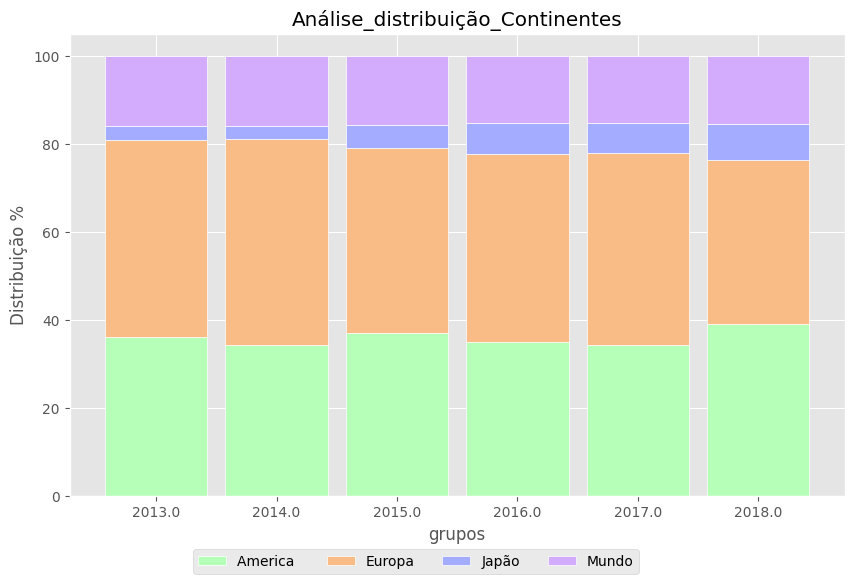

In [24]:
plt.figure(figsize=(10,6))
plt.title('Análise_distribuição_Continentes')
largura_barra = 0.85
rotulos = Analise['Year']
grupos = [0,1,2,3,4,5]

plt.bar(grupos, America, width=largura_barra, color=('#b5ffb9'), edgecolor='white')
plt.bar(grupos,Europa, bottom=America, width=largura_barra, color = ('#f9bc86'), edgecolor='white')
plt.bar(grupos, Japao, bottom=[A + B for A, B in zip(America, Europa)], width = largura_barra, color ='#a3acff', edgecolor= 'white')
plt.bar(grupos, Mundo, bottom=[A + B + C for A, B, C in zip( America, Europa, Japao)], width=largura_barra, color= '#d3acfe', edgecolor='white')

plt.xticks(grupos,rotulos)
plt.xlabel('grupos')
plt.ylabel('Distribuição %')

plt.legend(["America ", "Europa","Japão", "Mundo"], loc= 'upper left', bbox_to_anchor=(0.15, -0.1), ncol=4);

In [25]:
base_dados['Publisher'],['Global']

(0                   Rockstar Games
 1                       Activision
 2                   Rockstar Games
 3                       Activision
 4                        EA Sports
                    ...            
 1024                    THQ Nordic
 1026                    THQ Nordic
 1027        Daedalic Entertainment
 1028    Bandai Namco Entertainment
 1030                 Tammeka Games
 Name: Publisher, Length: 805, dtype: object,
 ['Global'])

In [26]:
# transformando nome de fornecedores em numeros , criamos uma nova tabela

from sklearn.preprocessing import LabelEncoder
funcao_Label = LabelEncoder()
funcao_Label.fit_transform(base_dados['Publisher'])
base_dados['Produtor'] = funcao_Label.fit_transform(base_dados['Publisher'])
base_dados['Genero'] = funcao_Label.fit_transform(base_dados['Genre'])
base_dados['Jogo'] = funcao_Label.fit_transform(base_dados['Game'])

In [27]:
base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [28]:
# paletas de cores

paleta_cores = sns.color_palette('husl', 8)
paleta_cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

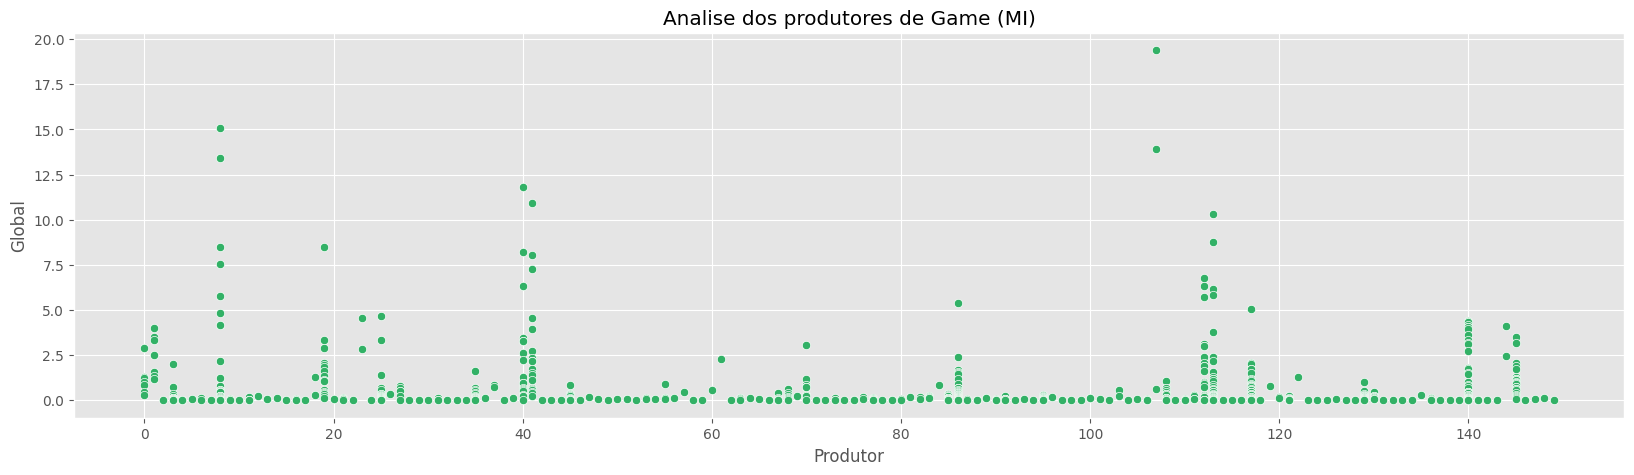

In [29]:
plt.figure(figsize=(20,5))
plt.title('Analise dos produtores de Game (MI)')
sns.scatterplot(data=base_dados, x='Produtor', y='Global', color=paleta_cores[3]);

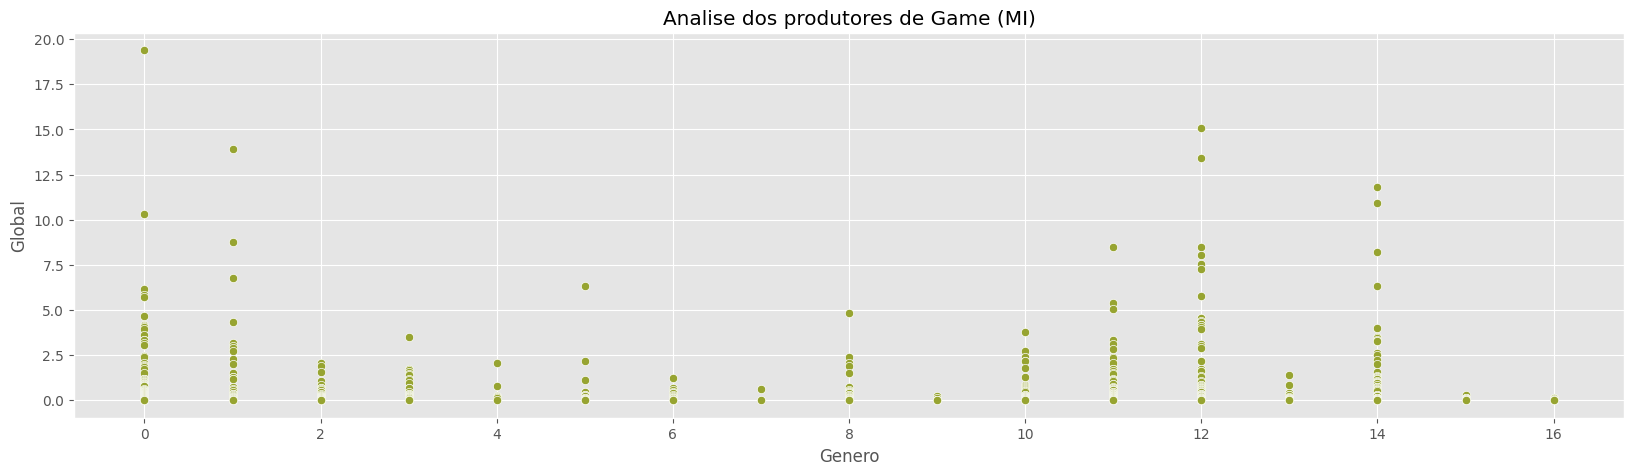

In [30]:
plt.figure(figsize=(20,5))
plt.title('Analise dos produtores de Game (MI)')
sns.scatterplot(data=base_dados, x='Genero', y='Global', color=paleta_cores[2]);

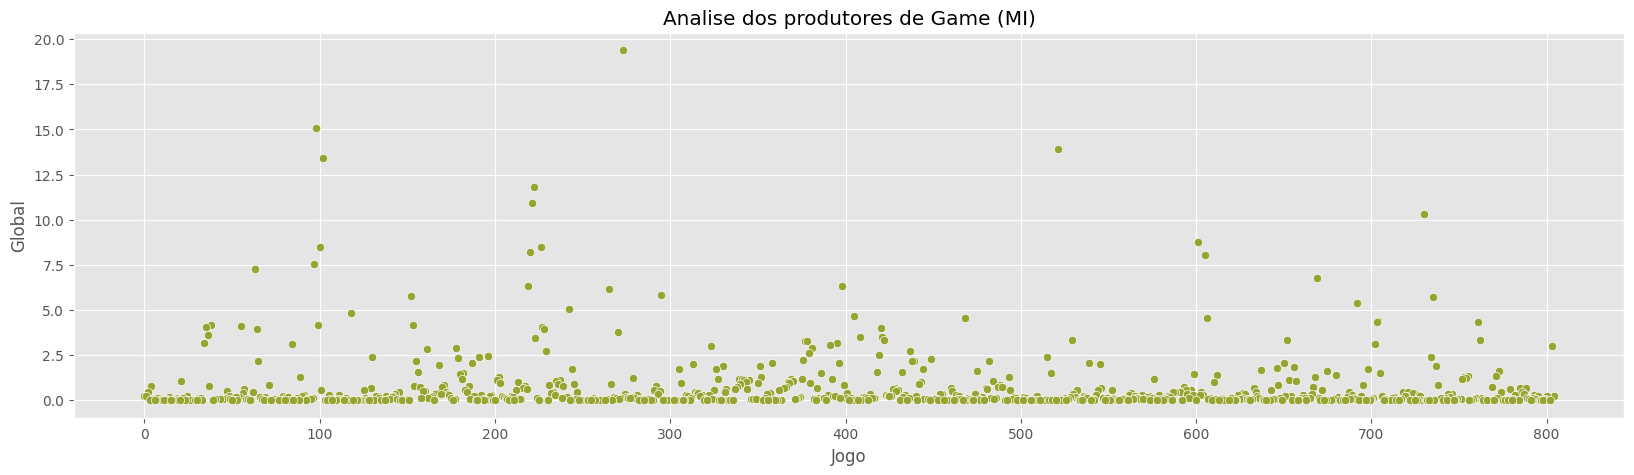

In [31]:
plt.figure(figsize=(20,5))
plt.title('Analise dos produtores de Game (MI)')
sns.scatterplot(data=base_dados, x='Jogo', y='Global', color=paleta_cores[2]);

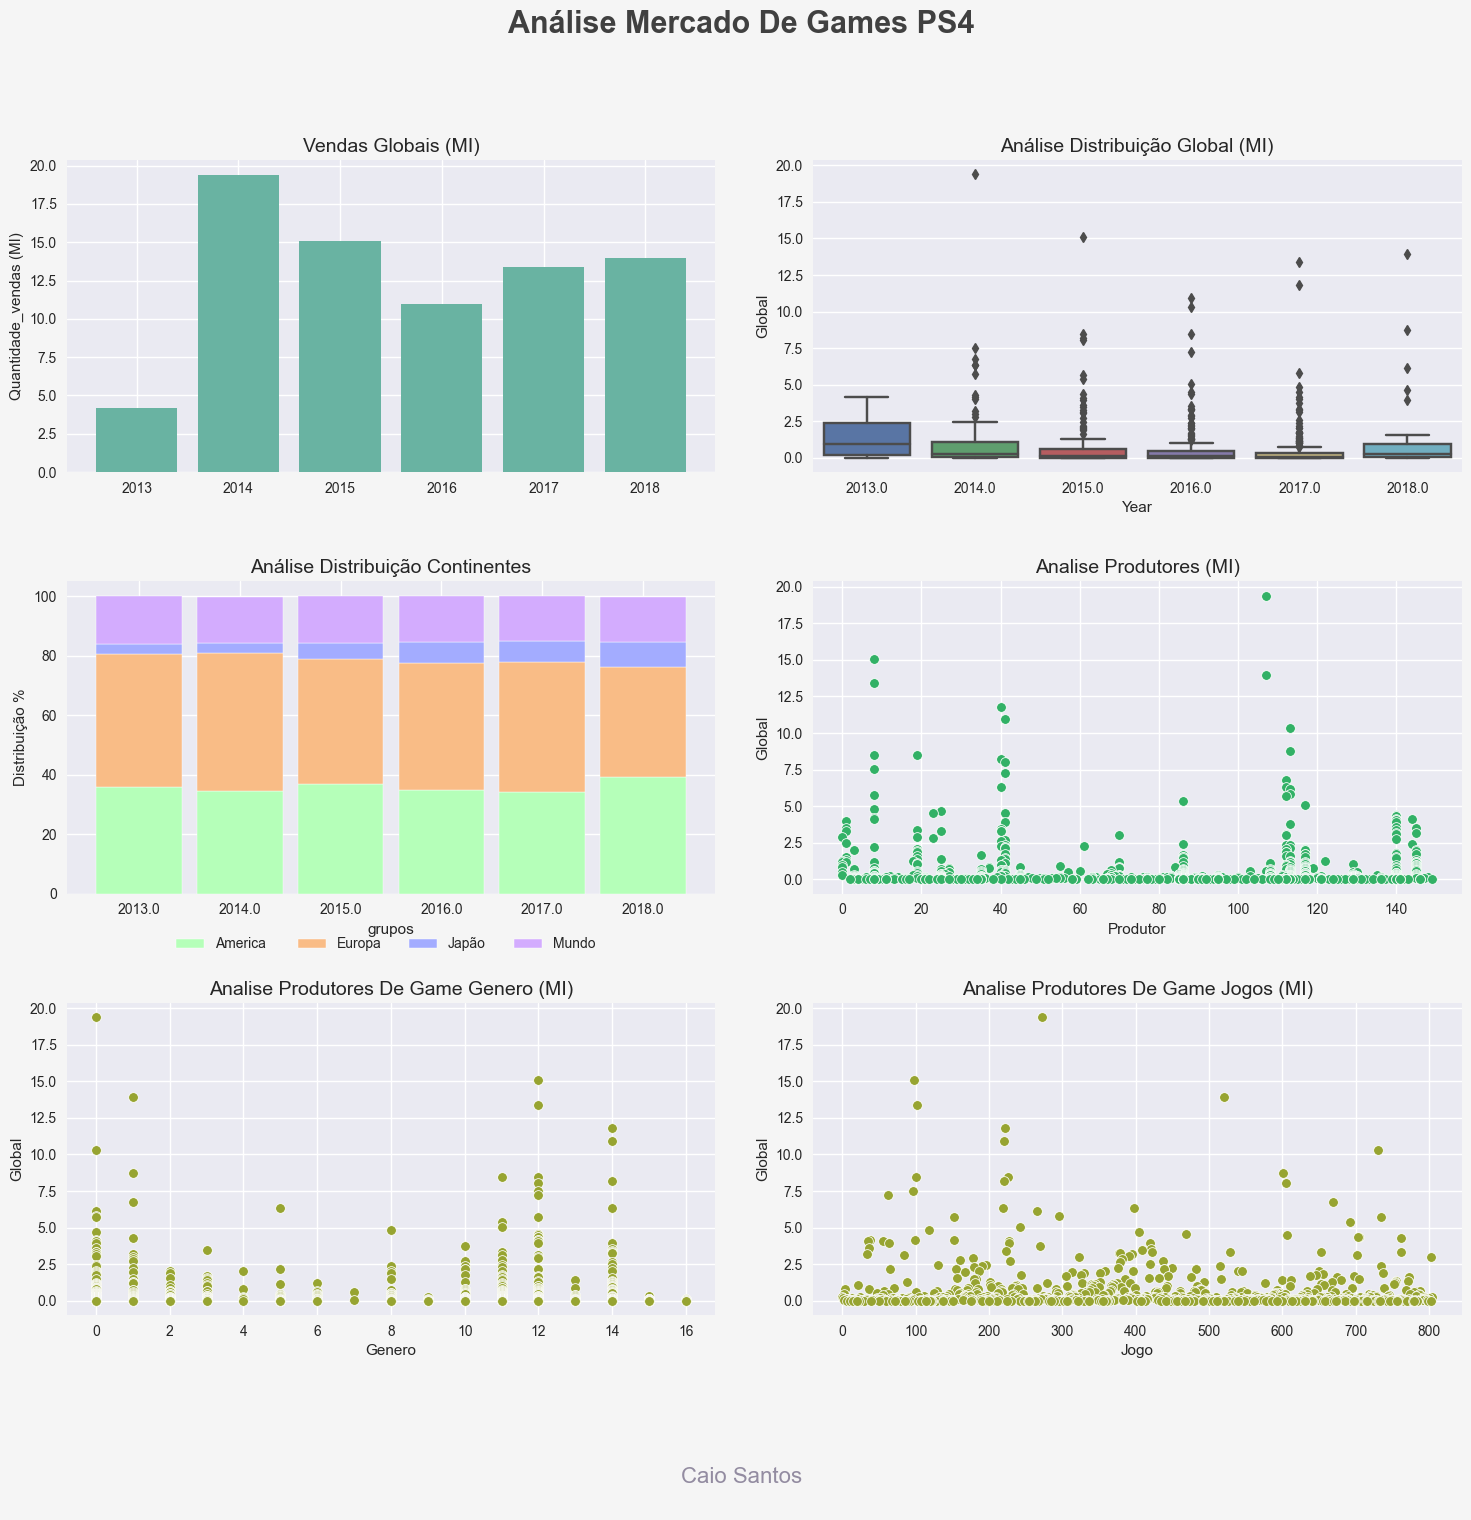

In [32]:
# relatorio gerencial 

# tamanhos
fig, ax = plt.subplots(figsize=(18,15))

# Cor de fundo
cor_fundo='#f5f5f5'
ax.set_facecolor(cor_fundo)
fig.set_facecolor(cor_fundo)

# estilo dos graficos
plt.style.use('seaborn')

# titulo da figura
plt.suptitle('Análise Mercado De Games PS4', fontsize= 22, color= '#404040', fontweight= 600)

#parametros para o grid
linhas = 3
colunas = 2

# acessando o grafico 1
plt.subplot(linhas, colunas,1)

# titulo
plt.title('Vendas Globais (MI)', fontsize= 14)
# Grafico
plt.bar( base_dados['Year'], base_dados ['Global'], color= '#69b3a2')
# Label
plt.ylabel('Quantidade_vendas (MI)')

#________________________________________________________________________________________________________

# acessando o grafico 2
plt.subplot(linhas, colunas,2)

# titulo
plt.title('Análise Distribuição Global (MI)', fontsize= 14)
# Grafico
sns.boxplot( data= base_dados, x= 'Year', y= 'Global')

#_____________________________________________________________________________________________________

# acessando o grafico 3
plt.subplot(linhas, colunas,3)

# titulo
plt.title('Análise Distribuição Continentes', fontsize= 14)
largura_barra = 0.85
rotulos = Analise['Year']
grupos = [0,1,2,3,4,5]

# Grafico
plt.bar(grupos, America, width=largura_barra, color=('#b5ffb9'), edgecolor='white')
plt.bar(grupos,Europa, bottom=America, width=largura_barra, color = ('#f9bc86'), edgecolor='white')
plt.bar(grupos, Japao, bottom=[A + B for A, B in zip(America, Europa)], width = largura_barra, color ='#a3acff', edgecolor= 'white')
plt.bar(grupos, Mundo, bottom=[A + B + C for A, B, C in zip( America, Europa, Japao)], width=largura_barra, color= '#d3acfe', edgecolor='white')

plt.xticks(grupos,rotulos)
plt.xlabel('grupos')
plt.ylabel('Distribuição %')

plt.legend(["America ", "Europa","Japão", "Mundo"], loc= 'upper left', bbox_to_anchor=(0.15, -0.1), ncol=4)

#______________________________________________________________________________________________________

# acessando o grafico 4
plt.subplot(linhas, colunas,4)

# Titulo
plt.title('Analise Produtores (MI)', fontsize= 14 )

# grafico
sns.scatterplot(data=base_dados, x='Produtor', y='Global', color=paleta_cores[3])

#__________________________________________________________________________________________________

# # acessando o grafico 5
plt.subplot(linhas, colunas,5)

# titulo
plt.title('Analise Produtores De Game Genero (MI)', fontsize= 14)

# grafico
sns.scatterplot(data=base_dados, x='Genero', y='Global', color=paleta_cores[2]);

#_____________________________________________________________________________________________________________

# acessando o grafico 6
plt.subplot(linhas, colunas,6)

# titulo
plt.title('Analise Produtores De Game Jogos (MI)', fontsize= 14)

# grafico
sns.scatterplot(data=base_dados, x='Jogo', y='Global', color=paleta_cores[2])

#____________________________________________________________________________________________________________

# Ajustar o laout
plt.subplots_adjust(hspace= 0.35, wspace= 0.15)

# rodapé
rodape= '''
Caio Santos
'''

# incluindo rodapé
fig.text(0.5, -0.02, rodape, ha= 'center', va= 'bottom', size= 16, color= '#938ca1');